# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

orders = pd.read_csv("orders.csv")
orders.head()


,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


What went wrong with this metric (AOV) and the current analysis in general? 

The mean AOV is dominated by extreme outliers, so it does not represent a typical order. The data include very large bulk orders that create huge order values and a shop that sells a very expensive item per unit, both of which push the mean far above the normal purchasing pattern. The visualizations below illustrate the heavy right tail of the distribution and the mismatch between typical orders and the outliers.


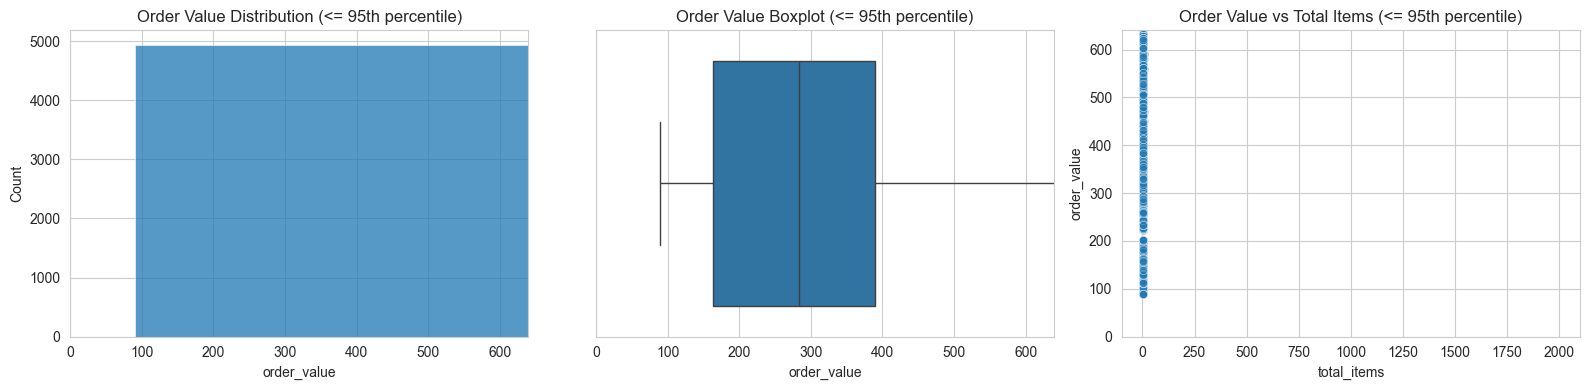

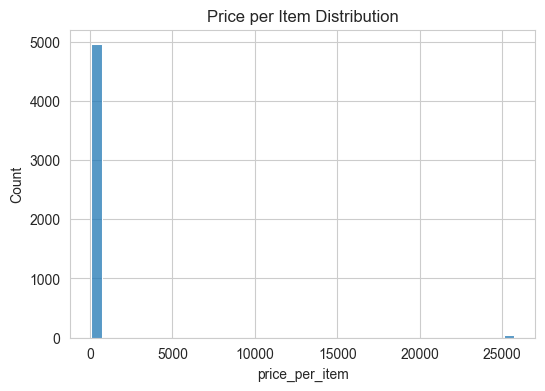

shop_id
42    235101.490196
78     49213.043478
50       403.545455
90       403.224490
38       390.857143
Name: order_value, dtype: float64

In [22]:
orders["price_per_item"] = orders["order_value"] / orders["total_items"]

orders[["order_value", "total_items", "price_per_item"]].describe()

# 95th percentile so typical orders are visible
p95 = orders["order_value"].quantile(0.95)

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

sns.histplot(orders["order_value"], bins=60, ax=axes[0])
axes[0].set_title("Order Value Distribution (<= 95th percentile)")
axes[0].set_xlabel("order_value")
axes[0].set_xlim(0, p95)

sns.boxplot(x=orders["order_value"], ax=axes[1])
axes[1].set_title("Order Value Boxplot (<= 95th percentile)")
axes[1].set_xlabel("order_value")
axes[1].set_xlim(0, p95)

sns.scatterplot(data=orders, x="total_items", y="order_value", alpha=0.6, ax=axes[2])
axes[2].set_title("Order Value vs Total Items (<= 95th percentile)")
axes[2].set_xlabel("total_items")
axes[2].set_ylabel("order_value")
axes[2].set_ylim(0, p95)

plt.tight_layout()
plt.show()

# Price per item distribution
plt.figure(figsize=(6, 4))
sns.histplot(orders["price_per_item"], bins=40)
plt.title("Price per Item Distribution")
plt.xlabel("price_per_item")
plt.show()

# Identify top outlier shops
orders.groupby("shop_id")["order_value"].mean().sort_values(ascending=False).head(5)


Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values? 

A better representation uses robust or normalized metrics such as the median order value, the median price per item, and total revenue per item, because these reduce the influence of extreme bulk orders and unusually expensive items. These metrics better reflect the typical customer experience and provide stable values that align with the bulk of the distribution; the next cell computes their exact values from the dataset.


In [23]:
import numpy as np

mean_aov = orders["order_value"].mean()
median_aov = orders["order_value"].median()
median_price_per_item = orders["price_per_item"].median()
weighted_price_per_item = orders["order_value"].sum() / orders["total_items"].sum()

print(f"Mean AOV: ${mean_aov:,.2f}")
print(f"Median AOV: ${median_aov:,.2f}")
print(f"Median price per item: ${median_price_per_item:,.2f}")
print(f"Revenue per item (weighted): ${weighted_price_per_item:,.2f}")

# Optionally, a trimmed mean as a robust alternative
trimmed = orders["order_value"].sort_values().iloc[250:-250].mean()
print(f"10% trimmed mean AOV: ${trimmed:,.2f}")


Mean AOV: $3,145.13
Median AOV: $284.00
Median price per item: $153.00
Revenue per item (weighted): $357.92
10% trimmed mean AOV: $294.39


Using the created_at column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior. 

The analysis examines orders over time by date, day of week, and hour of day to surface any concentration of purchasing activity. The plots below show the time-based distribution of orders and help identify any daily or hourly patterns in customer behavior.


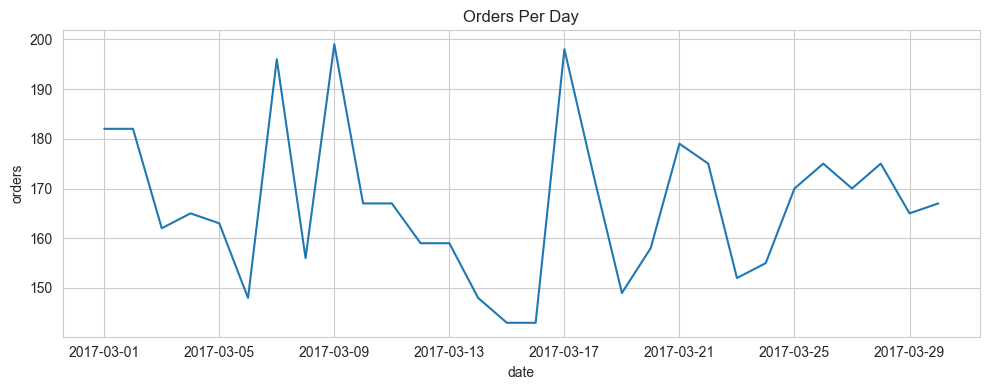

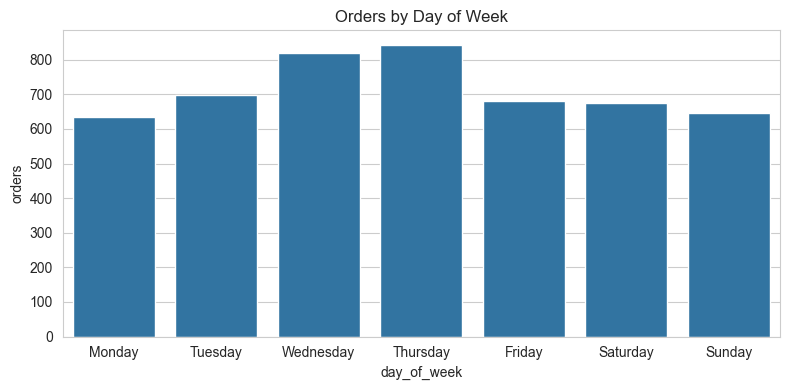

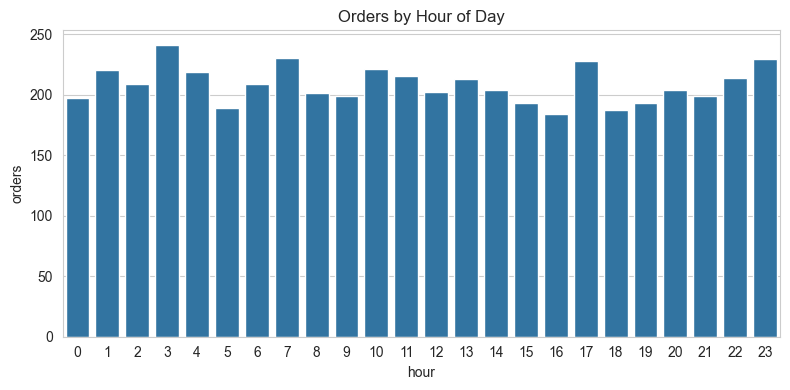

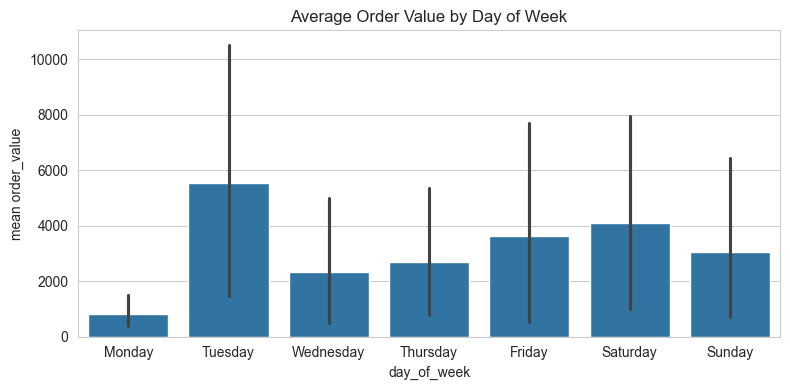

In [24]:
orders["created_at"] = pd.to_datetime(orders["created_at"])
orders["date"] = orders["created_at"].dt.date
orders["day_of_week"] = orders["created_at"].dt.day_name()
orders["hour"] = orders["created_at"].dt.hour

# Orders per day
daily_counts = orders.groupby("date").size()
plt.figure(figsize=(10, 4))
daily_counts.plot()
plt.title("Orders Per Day")
plt.xlabel("date")
plt.ylabel("orders")
plt.tight_layout()
plt.show()

# Orders by day of week
plt.figure(figsize=(8, 4))
sns.countplot(data=orders, x="day_of_week", order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Orders by Day of Week")
plt.xlabel("day_of_week")
plt.ylabel("orders")
plt.tight_layout()
plt.show()

# Orders by hour of day
plt.figure(figsize=(8, 4))
sns.countplot(data=orders, x="hour")
plt.title("Orders by Hour of Day")
plt.xlabel("hour")
plt.ylabel("orders")
plt.tight_layout()
plt.show()

# Optional: AOV by day of week
plt.figure(figsize=(8, 4))
sns.barplot(data=orders, x="day_of_week", y="order_value", order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], estimator=np.mean)
plt.title("Average Order Value by Day of Week")
plt.xlabel("day_of_week")
plt.ylabel("mean order_value")
plt.tight_layout()
plt.show()
